# Tarea 2. Eigenfaces
## Isaac Rodríguez Bribiesca

### Resumen. 

In [1]:
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import numpy as np

### Ejercicio 1. Función PCA

In [123]:
def pca(X, k):
    """Perform PCA via SVD over matrix X

    Args:
        X (numpy 2D array): Data matrix of shape (n, d).
        Where n is the number of examples and d the dimension of each example.
        
        k (int): Number of principal components to extract.

    Returns:
        Data matrix projected on the k PC´s
        
        Set of principal directions
        
        Set of singular values
    """
    # Center data
    X_mu = X - np.mean(X, axis=0)
    
    # Scale data
    #X_s = X_mu / np.std(X_mu, axis=0)
    X_s = X_mu / 1
    
    # SVD calculation
    U, D, V = np.linalg.svd(X_s, full_matrices=True)
    
    # keep only k firts eigenvectors
    V = V.T[:, :k]
    
    # Project data onto k eigenvectors chosen
    X_svd = X.dot(V)
    
    #print("\n Shape D: ", D.shape)
    #print("\n Shape V: ", V.shape)
    #print("\n Shape X_svd: ", X_svd.shape)
    
    return X_svd, V, D

Function for showing images in a grid

In [77]:
def show_images(n_rows, n_cols, images, shape, labels = [], size = 5.):
    
    fig = plt.figure(figsize=(size, size))
    #plt.suptitle(title, size=16)

    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # creates n_rowsxn_cols grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
        
    if labels:
        grid[0].set_title(labels[0], fontdict=None, loc='center', color = "k")
        grid[1].set_title(labels[1], fontdict=None, loc='center', color = "k")

    for ax, im in zip(grid, images[:n_rows*n_cols]):
        
        ax.imshow(im.reshape(shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

    plt.show()

### Ejercicio 2. MNIST

Load data

In [114]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
data = X_test.reshape((10000, 28*28))

print("{0} data examples of size {1}".format(X_test.shape[0], data.shape[1]))

10000 data examples of size 784


Visualizing images

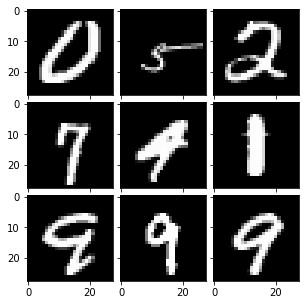

In [116]:
show_images(3, 3, np.random.permutation(data)[:9], (28, 28))

#### a) PCA and variance explained by k first components

Define number of eigenvectors to use

In [126]:
k = 300

Apply PCA to matrix of images $X$

In [127]:
X_svd, V, lambdas = pca(data, k)

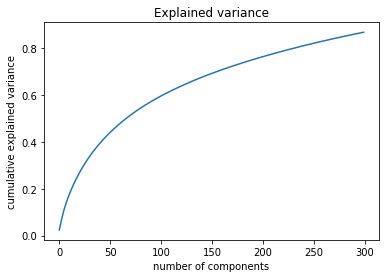

Explained variance by the first 300 eigenvectors: 0.8663374757200982


In [128]:
var_ratio = [l/np.sum(lambdas) for l in lambdas[:k]]

plt.plot(np.cumsum(var_ratio))
plt.title("Explained variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print("Explained variance by the first %s eigenvectors: %s" % (k, np.sum(lambdas[:k])/np.sum(lambdas)))

Visualizing first 9 eigenvectors

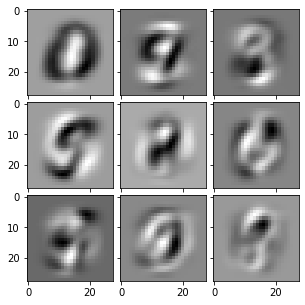

In [130]:
show_images(3, 3, V.T[:9], (28, 28))

#### b) PCA for different values of k


PCA for 10 eigenvectors

 Mean error: 1255.3148035748152


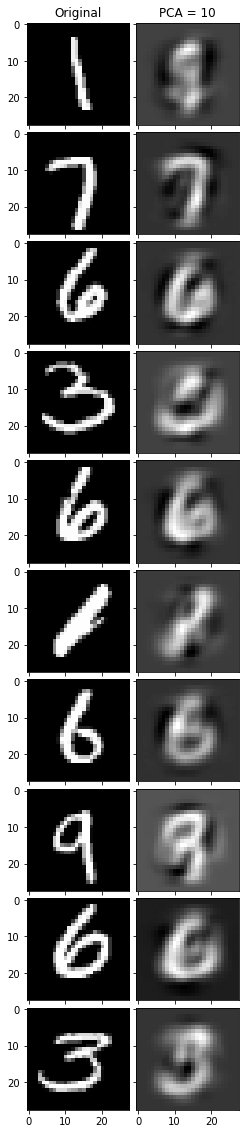


PCA for 30 eigenvectors

 Mean error: 941.5909938776149


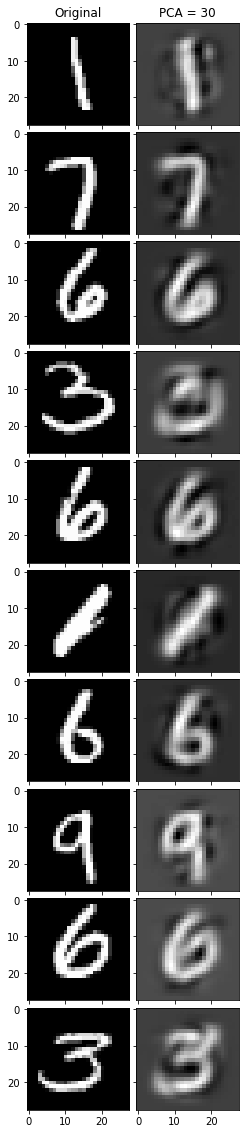


PCA for 50 eigenvectors

 Mean error: 739.218526441623


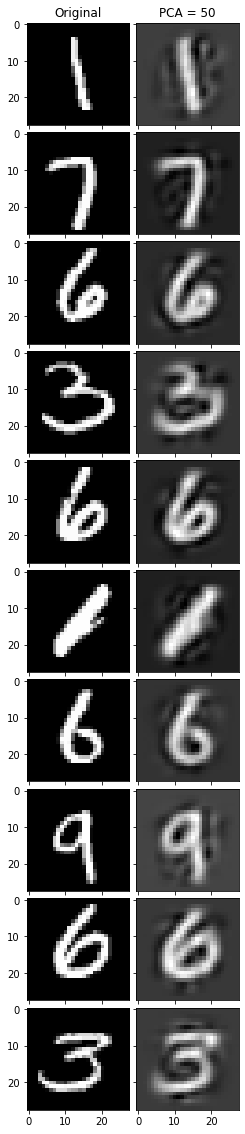


PCA for 100 eigenvectors

 Mean error: 501.1442862176743


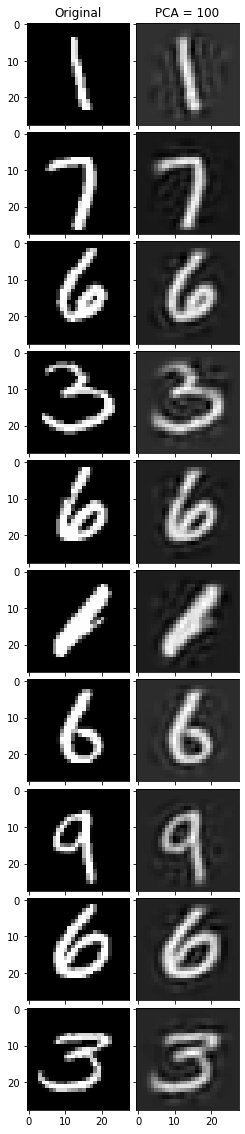


PCA for 200 eigenvectors

 Mean error: 319.151167919398


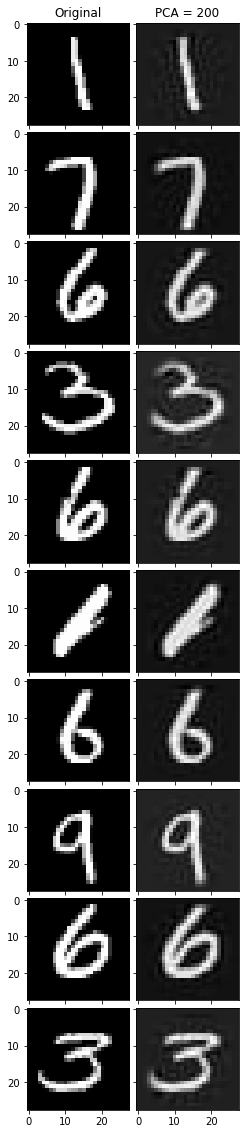


PCA for 400 eigenvectors

 Mean error: 93.36998920790627


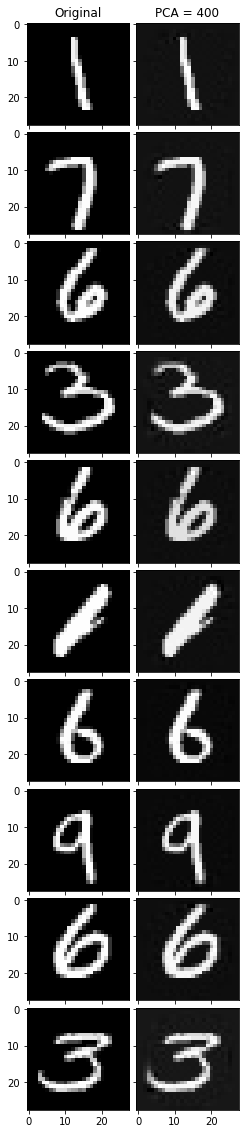


PCA for 700 eigenvectors

 Mean error: 4.022106566849179e-12


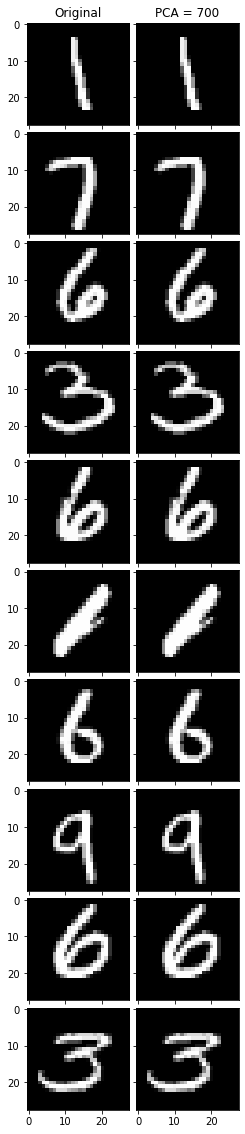

In [132]:
# Values for k
k_values = [10, 30, 50, 100, 200, 400, 700]

# Number of images to test
num_images = 10

# Choose num_images random images from dataset
image_indices = np.random.choice(data.shape[0], num_images)

# List to save mean error for each choice of k
error_history = []

for k in k_values:
    
    print("\nPCA for %s eigenvectors" % k)
    
    # Perform PCA
    
    X_svd, V, lambdas = pca(data, k)
    
    images = []
        
    for index in image_indices:
        
        # Reconstruct each image
    
        x_hat = V.dot(X_svd[index])
        
        images.append(data[index])
        images.append(x_hat)
        
    # Calculate mean reconstruction error
    
    error = np.mean([np.linalg.norm(images[i]-images[i+1]) for i in range(0, len(images), 2)])
    error_history.append(error)
    
    print("\n Mean error: %s" % error)
        
    # Plot original and reconstructed images

    show_images(num_images, 2, images, (28, 28), ["Original", "PCA = "+str(k)], 20.)

#### c) Graph of reconstruction error vs number of components

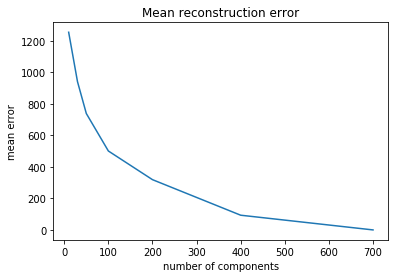

In [135]:
plt.plot(k_values, error_history)
plt.title("Mean reconstruction error")
plt.xlabel('number of components')
plt.ylabel('mean error')
plt.show()

#### Discusión

### Ejercicio 3. AT&T Faces

Load data

In [4]:
from sklearn.datasets import fetch_olivetti_faces
data, targets = fetch_olivetti_faces(return_X_y=True)

print("{0} data examples of size {1}".format(data.shape[0], data.shape[1]))

400 data examples of size 4096


Visualizing images

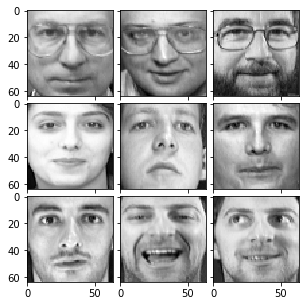

In [74]:
show_images(3, 3, np.random.permutation(data)[:9], (64, 64))

#### a) PCA and variance explained by k first components

Define number of eigenvectors to use

In [49]:
k = 300

Apply PCA to matrix of images $X$

In [62]:
X_svd, V, lambdas = pca(data, k)

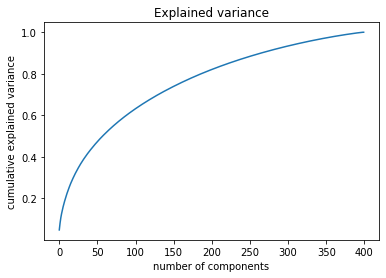

Explained variance by the first 2000 eigenvectors: 1.0


In [101]:
var_ratio = [l/np.sum(lambdas) for l in lambdas[:k]]

plt.plot(np.cumsum(var_ratio))
plt.title("Explained variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print("Explained variance by the first %s eigenvectors: %s" % (k, np.sum(lambdas[:k])/np.sum(lambdas)))

Visualizing first 9 eigenfaces

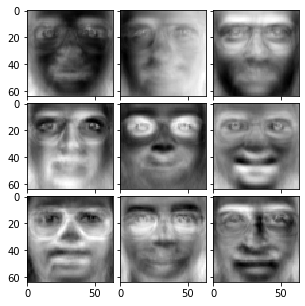

In [75]:
show_images(3, 3, V.T[:9], (64, 64))

#### b) PCA for different values of k


PCA for 10 eigenvectors

 Mean error: 7.6937456


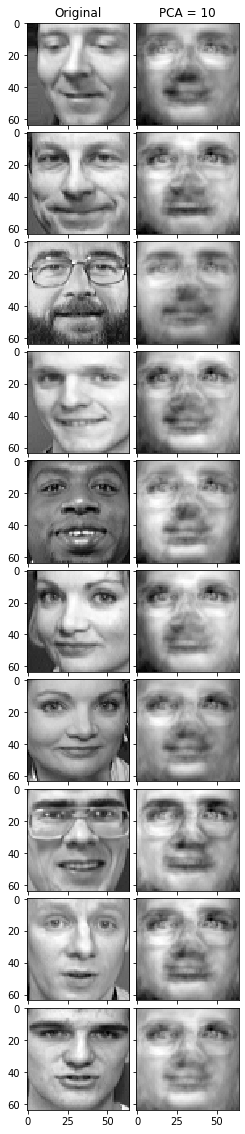


PCA for 30 eigenvectors

 Mean error: 5.5254087


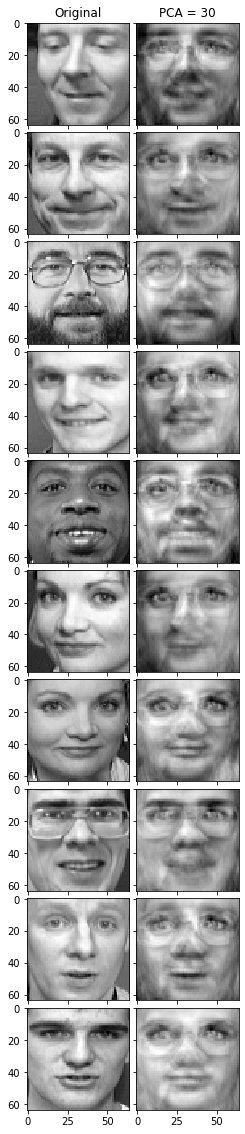


PCA for 50 eigenvectors

 Mean error: 4.781842


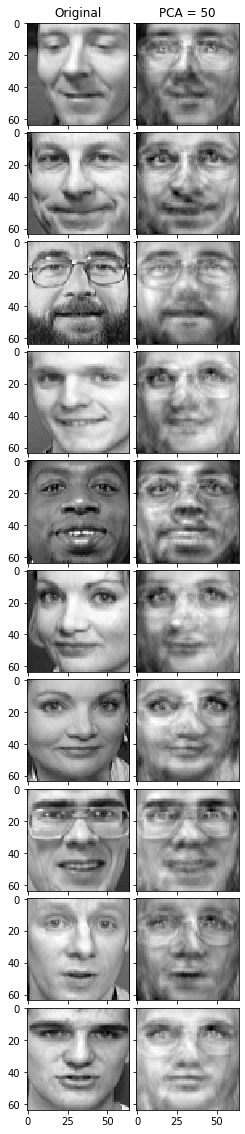


PCA for 100 eigenvectors

 Mean error: 3.8007302


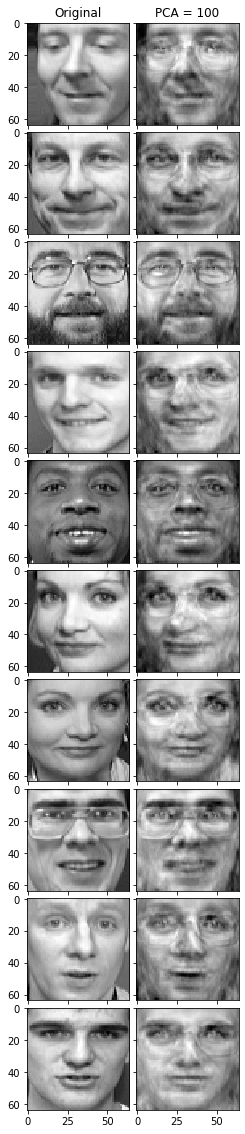


PCA for 200 eigenvectors

 Mean error: 2.937629


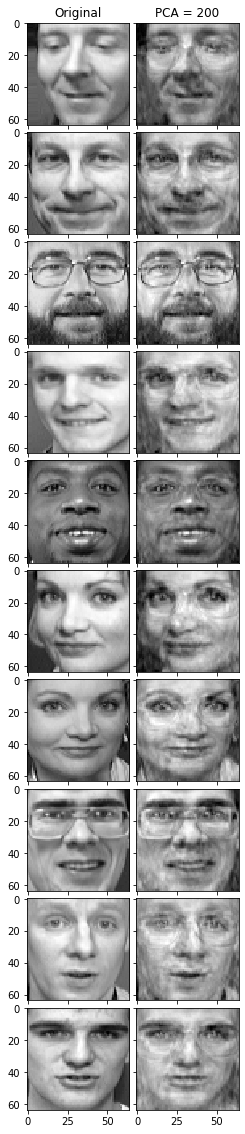


PCA for 400 eigenvectors

 Mean error: 2.167158


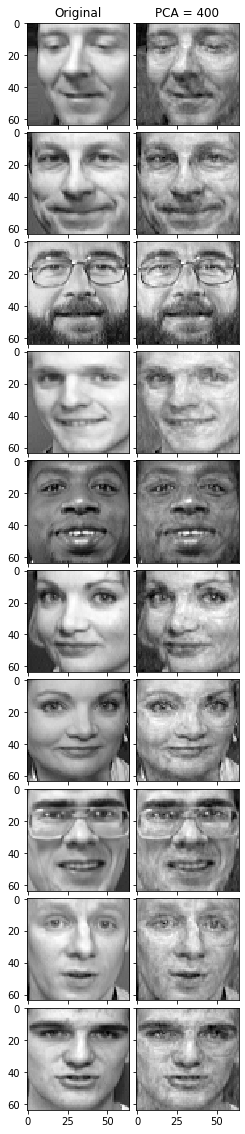


PCA for 2000 eigenvectors

 Mean error: 1.472026


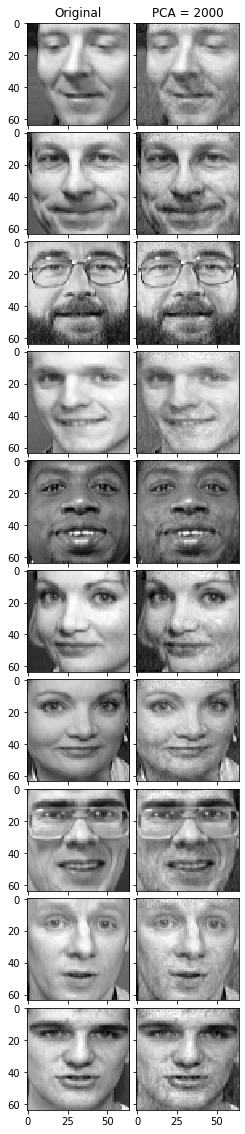

In [97]:
# Values for k
k_values = [10, 30, 50, 100, 200, 400, 2000]

# Number of images to test
num_images = 10

# Choose num_images random images from dataset
image_indices = np.random.choice(data.shape[0], num_images)

# List to save mean error for each choice of k
error_history = []

for k in k_values:
    
    print("\nPCA for %s eigenvectors" % k)
    
    # Perform PCA
    
    X_svd, V, lambdas = pca(data, k)
    
    images = []
        
    for index in image_indices:
        
        # Reconstruct each image
    
        x_hat = V.dot(X_svd[index])
        
        images.append(data[index])
        images.append(x_hat)
        
    # Calculate mean reconstruction error
    
    error = np.mean([np.linalg.norm(images[i]-images[i+1]) for i in range(0, len(images), 2)])
    error_history.append(error)
    
    print("\n Mean error: %s" % error)
        
    # Plot original and reconstructed images

    show_images(num_images, 2, images, (64, 64), ["Original", "PCA = "+str(k)], 20.)

#### c) Graph of reconstruction error vs number of components

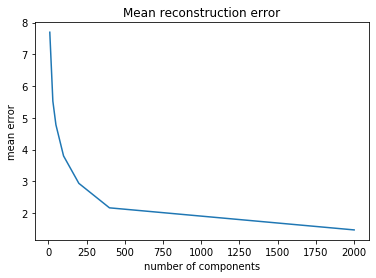

In [102]:
plt.plot(k_values, error_history)
plt.title("Mean reconstruction error")
plt.xlabel('number of components')
plt.ylabel('mean error')
plt.show()

#### Discusión